In [1]:
import pandas as pd

In [13]:
gender = pd.read_csv('gender_submission.csv')
gender.head()
# gender.shape

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [12]:
test = pd.read_csv('test.csv')
test.head()
# test.shape

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
train = pd.read_csv('train.csv')
train.head()
# train.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
y = train.Survived.values

array([0, 1], dtype=int64)

In [20]:
train['Age'] = train.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x : x.fillna(x.median()))

In [31]:
x = train.drop(['Survived', 'Name', 'Cabin','Embarked', 'Ticket', 'PassengerId'], axis = 1)
x = pd.get_dummies(x[x.columns])

In [19]:
train_corr = train.corr().unstack().reset_index()
train_corr[train_corr['level_0'] == 'Age']

,level_0,level_1,0
21,Age,PassengerId,0.036847
22,Age,Survived,-0.077221
23,Age,Pclass,-0.369226
24,Age,Age,1.000000
25,Age,SibSp,-0.308247
26,Age,Parch,-0.189119
27,Age,Fare,0.096067


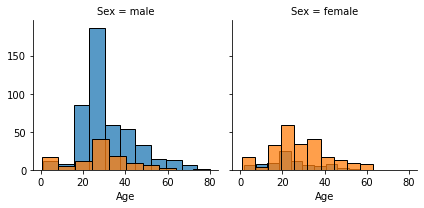

In [23]:
import seaborn as sns

grid = sns.FacetGrid(data = train, col = 'Sex', hue = 'Survived')
grid.map(sns.histplot, 'Age', bins = 10)

In [39]:
test['Age'] = test.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x : x.fillna(x.median()))
test['Fare'] = test.groupby(['Sex', 'Pclass'])['Fare'].apply(lambda x : x.fillna(x.median()))

x_test = test.drop(['Name', 'Cabin', 'Embarked', 'Ticket', 'PassengerId'], axis = 1)
x_test = pd.get_dummies(x_test[x_test.columns])
y_test = gender['Survived']


In [32]:
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1
887,1,19.0,0,0,30.0000,1,0
888,3,21.5,1,2,23.4500,1,0
889,1,26.0,0,0,30.0000,0,1


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

lr = LogisticRegression(random_state = 21)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
lr.fit(x_scaled, y)

LogisticRegression(random_state=21)

In [34]:
y_pred = lr.predict(x_scaled)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix(y, y_pred)
print(cm)

print(accuracy_score(y, y_pred))

print(classification_report(y, y_pred))

[[478  71]
 [101 241]]
0.8069584736251403
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       549
           1       0.77      0.70      0.74       342

    accuracy                           0.81       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.81      0.81      0.81       891



In [40]:
x_test_scaled = scaler.transform(x_test)

y_test_pred = lr.predict(x_test_scaled)

cm = confusion_matrix(y_test, y_test_pred)
print(cm)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test,y_test_pred))

[[252  14]
 [ 11 141]]
0.9401913875598086
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       266
           1       0.91      0.93      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



In [42]:
output = pd.DataFrame(data = {
    'PassengerId': test.PassengerId,
    'Survived' : y_test_pred
})
output.to_csv('results.csv', index=False)